In [ ]:
# this is a test simulated run on a pruned customer data where customer analytics is a branch of modeling the ecommerce business


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
# the minimal requirements are added to the repository i guess!! leets see what is in store

In [2]:
from pathlib import Path
root= Path('data')
df = pd.read_csv(root / 'marketingCustomer.csv')


In [8]:
# the file object is now loaded into the python compiler
# now find the size of the dataset

In [9]:
df.shape

(9134, 24)

In [10]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
# now get the analytics on the engaged customers  

# Understand how different customers beheave and react to different maketing strategies

# --- starting wwith  the overall engagement rates 

In [11]:
df.groupby('Response').count()

,Customer,State,Customer Lifetime Value,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Response,,,,,,,,,,,,,,,,,,,,,
No,7826,7826,7826,7826,7826,7826,7826,7826,7826,7826,...,7826,7826,7826,7826,7826,7826,7826,7826,7826,7826
Yes,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,...,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308


In [13]:
# just filter out the customer field from the above learning

df.groupby('Response').count()['Customer']

Response
No     7826
Yes    1308
Name: Customer, dtype: int64

In [ ]:
# vizualize this in a bar plot

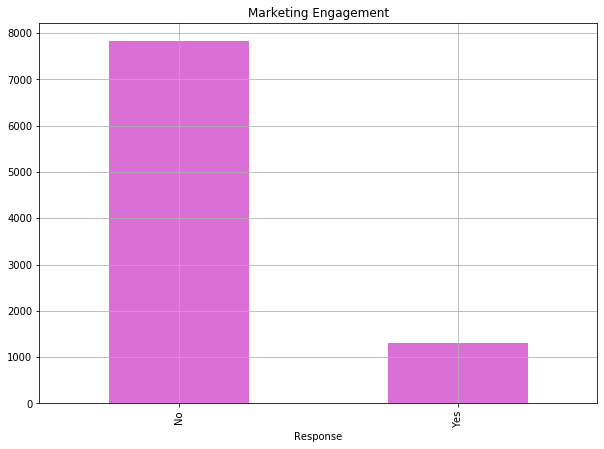

In [16]:
ax=df.groupby('Response').count()['Customer'].plot(
kind='bar',color='orchid',grid=True, figsize=(10,7), title= 'Marketing Engagement')

In [19]:
#calculate the percentages of the engaged and non engaged customers

df.groupby('Response').count()['Customer']/df.shape[0]


Response
No     0.856799
Yes    0.143201
Name: Customer, dtype: float64

In [23]:
#chapter 2

# engagement rates by offer types presented to the customer

In [25]:
byOfferTypeDF= df.loc[ df['Response']=='Yes'].groupby(['Renew Offer Type']).count()['Customer']

In [28]:
erateByOfferType= byOfferTypeDF/df.groupby(['Renew Offer Type']).count()['Customer']

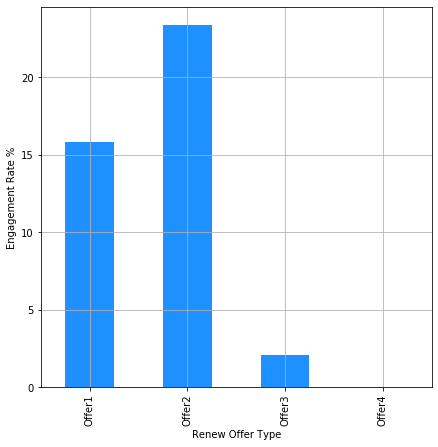

In [30]:
ax=(erateByOfferType*100).plot(kind='bar',figsize=(7,7),color='dodgerblue',grid=True)

ax.set_ylabel('Engagement Rate %')
plt.show()


In [ ]:
# chapter 3 

# classification by offer type

# how customers with different attributes respond to different marketing messages

In [10]:
byOfferTypeDFrame = df.loc[ df['Response']== 'Yes'].groupby(
    ['Renew Offer Type', 'Vehicle Class']).count()['Customer']/ df.groupby('Renew Offer Type').count()['Customer']

In [11]:
byOfferTypeDFrame

Renew Offer Type  Vehicle Class
Offer1            Four-Door Car    0.070362
                  Luxury Car       0.001599
                  Luxury SUV       0.004797
                  SUV              0.044776
                  Sports Car       0.011194
                  Two-Door Car     0.025586
Offer2            Four-Door Car    0.114833
                  Luxury Car       0.002051
                  Luxury SUV       0.004101
                  SUV              0.041012
                  Sports Car       0.016405
                  Two-Door Car     0.055366
Offer3            Four-Door Car    0.016760
                  Two-Door Car     0.004190
Name: Customer, dtype: float64

In [ ]:
# make the previous output more useful by using the unstack function to tabulate the columnar skewed dataset

# to pivot the data and extract the inner level roups to columns

In [12]:
byOfferTypeDFrame=byOfferTypeDFrame.unstack().fillna(0)

#print the output 

byOfferTypeDFrame

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,0.070362,0.001599,0.004797,0.044776,0.011194,0.025586
Offer2,0.114833,0.002051,0.004101,0.041012,0.016405,0.055366
Offer3,0.016760,0.000000,0.000000,0.000000,0.000000,0.004190


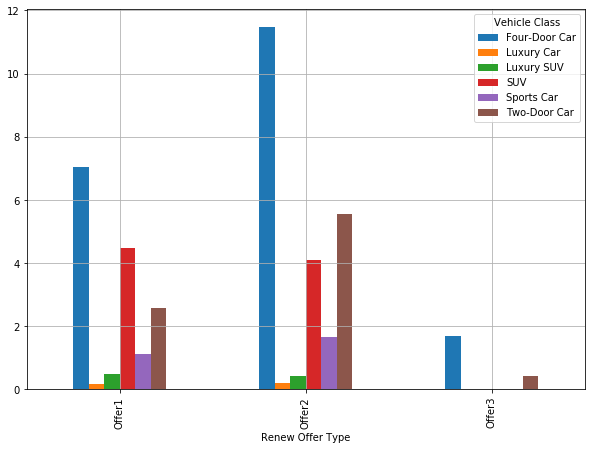

In [13]:
ax= (byOfferTypeDFrame*100).plot(kind='bar', figsize=(10,7),grid=True)

In [ ]:
# engagement rates differ by different sales channels

In [14]:
bySalesChannelDFrame=df.loc[df['Response']== 'Yes'].groupby([
                    'Sales Channel']).count()['Customer']/df.groupby('Sales Channel').count()['Customer']
bySalesChannelDFrame

Sales Channel
Agent          0.191544
Branch         0.114531
Call Center    0.108782
Web            0.117736
Name: Customer, dtype: float64

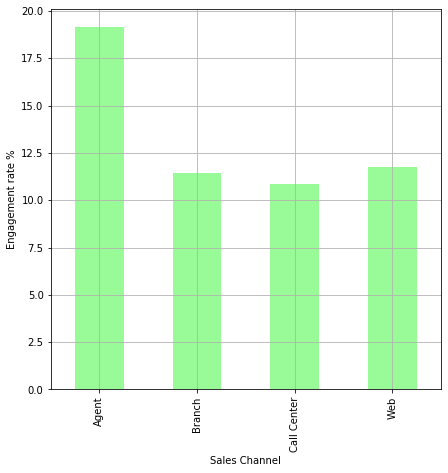

In [15]:
ax=(bySalesChannelDFrame*100).plot(
        kind='bar',
        figsize=(7,7),
        color='palegreen',
        grid=True)
ax.set_ylabel('Engagement rate %')
plt.show()

In [ ]:
# we can see that the agents work better in terms of getting responses from customers

#lets break the results deeper with more customer attributes


In [17]:
bySalesChannelDFrame=df.loc[df['Response']== 'Yes'].groupby([
                    'Sales Channel','Vehicle Size']).count()['Customer']/df.groupby('Sales Channel').count()['Customer']
# unstack the data into more visible format 

bySalesChannelDFrame=bySalesChannelDFrame.unstack().fillna(0)
bySalesChannelDFrame

Vehicle Size,Large,Medsize,Small
Sales Channel,,,
Agent,0.020708,0.144953,0.025884
Branch,0.021036,0.074795,0.018699
Call Center,0.013598,0.067989,0.027195
Web,0.013585,0.095094,0.009057


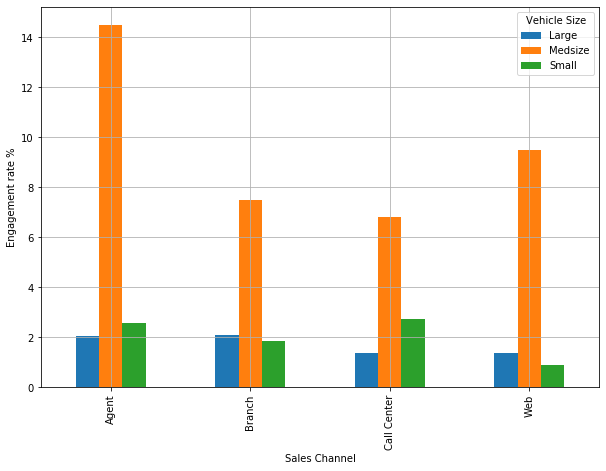

In [18]:
ax=(bySalesChannelDFrame*100).plot(
        kind='bar',
        figsize=(10,7),
        grid=True)
ax.set_ylabel('Engagement rate %')
plt.show()

In [ ]:
# as we can see customers with medium size vehicles resspond the best to all sales channel whereas the 
#other customers differs slightly in terms of the engagement rates accross different sales channels

In [ ]:
# chapter 6

# engagement rates by months since policy inception


In [4]:
byMonthsSinceInceptionDF=df.loc[df['Response']=='Yes'].groupby(by='Months Since Policy Inception'
                                                              )['Response'].count()/df.groupby(
                                                    by='Months Since Policy Inception')['Response'].count()*100

In [5]:
byMonthsSinceInceptionDF=byMonthsSinceInceptionDF.fillna(0)

byMonthsSinceInceptionDF


Months Since Policy Inception
0     14.457831
1     14.117647
2     20.224719
3     26.315789
4     19.780220
5      6.896552
6      0.000000
7      7.594937
8      7.407407
9     18.750000
10    15.789474
11    17.307692
12     6.000000
13    14.814815
14     0.000000
15    22.018349
16     0.000000
17    11.881188
18    13.333333
19    16.981132
20    11.650485
21    11.428571
22    12.903226
23    20.454545
24    21.951220
25    13.483146
26    15.000000
27    12.371134
28    17.475728
29    12.244898
        ...    
70    23.529412
71    12.000000
72    23.762376
73     6.818182
74    19.780220
75     6.122449
76     6.976744
77    18.947368
78     7.317073
79    11.881188
80    16.438356
81    15.789474
82     0.000000
83    24.000000
84     6.000000
85    14.117647
86     0.000000
87     7.894737
88     7.894737
89    18.556701
90    14.285714
91     8.000000
92    16.216216
93    26.666667
94    25.000000
95    15.584416
96    17.910448
97     0.000000
98     0.000000
99     7.6

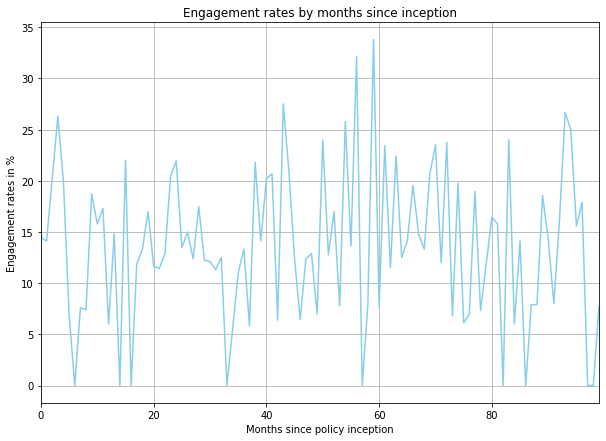

In [6]:
ax=byMonthsSinceInceptionDF.fillna(0).plot(
        figsize=(10,7),
        title='Engagement rates by months since inception',
        grid=True,
        color='skyblue')

ax.set_xlabel('Months since policy inception')
ax.set_ylabel('Engagement rates in %')

plt.show()

In [ ]:
# chapter 7 

# customer segmentation by customer lifetime value and months since inception



In [7]:
df['Customer Lifetime Value'].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

In [8]:
df["CLV Segment"] = df['Customer Lifetime Value'].apply(
        lambda x:'High' if x >df['Customer Lifetime Value'].median() else 'Low')

In [ ]:
#do the same thing for months since policy inception

In [11]:
df['Months Since Policy Inception'].describe()

count    9134.000000
mean       48.064594
std        27.905991
min         0.000000
25%        24.000000
50%        48.000000
75%        71.000000
max        99.000000
Name: Months Since Policy Inception, dtype: float64

In [12]:
df['Policy Age Segment']=df['Months Since Policy Inception'].apply(
    lambda x: 'High' if x > df['Months Since Policy Inception'].median() else 'Low')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,CLV Segment,Policy Age Segment
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,Low,Low
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,High,Low
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,High,Low
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,High,High
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,Low,Low


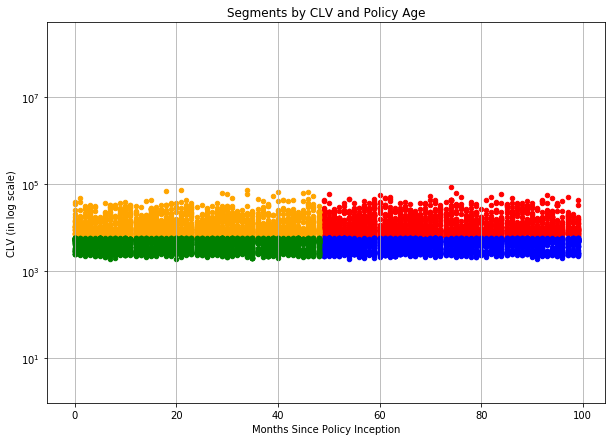

In [19]:
ax = df.loc[
    (df['CLV Segment']=='High') & (df['Policy Age Segment']=='High')
].plot.scatter(
x='Months Since Policy Inception',
y='Customer Lifetime Value',
logy=True,
color='red')
df.loc[
    (df['CLV Segment']=='Low') & (df['Policy Age Segment']=='High')
].plot.scatter(
ax=ax,
x='Months Since Policy Inception',
y='Customer Lifetime Value',
logy=True,
color='blue')

df.loc[ 
    (df['CLV Segment'] == 'High') & (df['Policy Age Segment'] == 'Low')
].plot.scatter( ax=ax, x='Months Since Policy Inception', y='Customer Lifetime Value', logy=True, color='orange' )

df.loc[ 
    (df['CLV Segment'] == 'Low') & (df['Policy Age Segment'] == 'Low') 
].plot.scatter( ax=ax, x='Months Since Policy Inception',y='Customer Lifetime Value', logy=True, color='green', grid=True, figsize=(10, 7))

ax.set_ylabel('CLV (in log scale)')
ax.set_xlabel('Months Since Policy Inception')
ax.set_title('Segments by CLV and Policy Age')
plt.show()


In [20]:
engagementRatesBySegmentDF=df.loc[
    df['Response']=='Yes'
].groupby([
    'CLV Segment', 'Policy Age Segment'
]).count()['Customer']/df.groupby([
    'CLV Segment', 'Policy Age Segment'
]).count()['Customer']

engagementRatesBySegmentDF

CLV Segment  Policy Age Segment
High         High                  0.138728
             Low                   0.132067
Low          High                  0.162450
             Low                   0.139957
Name: Customer, dtype: float64

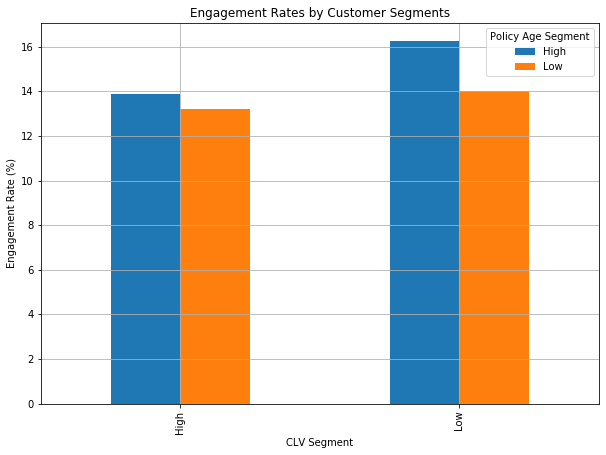

In [22]:
ax = (engagementRatesBySegmentDF.unstack()*100.0).plot( kind='bar', figsize=(10, 7), grid=True )
ax.set_ylabel('Engagement Rate (%)')
ax.set_title('Engagement Rates by Customer Segments')
plt.show()

In [ ]:
# thank you this s the end of this tutorial